# PumpItUp
## DrivenDataCompetition PumpItUp
- All data is within the same folder as notebook

In [2]:
import pandas as pd
import matplotlib as plt
import sklearn
import seaborn as sns

In [31]:
# load training-data and labels
trainingValues = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')
trainingLabels = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
trainingData = pd.merge(trainingValues, trainingLabels, on= 'id')

# Investigation on data
Possible data-issues
* population == 0 -> Delete all lines with population == 0
* num_private Not in feature-description -> check what to do with it
* object-data needs to be converted in category-numbers

In [53]:
# delete population == 0
trainingData = trainingData[trainingData.population != 0]


def createCatColumnsWithCodes(data : pd.DataFrame):
    cat_columns = data.select_dtypes(['object']).columns
    if len(cat_columns) == 0:
        return data
    data[cat_columns] = data[cat_columns].astype('category')
    cat_data = data[cat_columns].apply(lambda x: x.cat.codes)
    data = data.join(cat_data, rsuffix='_cat')

    return data

#change labels to category data
trainingData = createCatColumnsWithCodes(trainingData)


In [54]:
# Show data-frame top
trainingData.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality_cat,quality_group_cat,quantity_cat,quantity_group_cat,source_cat,source_type_cat,source_class_cat,waterpoint_type_cat,waterpoint_type_group_cat,status_group_cat
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,6,2,1,1,8,6,0,1,1,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,6,2,2,2,5,3,1,1,1,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,6,2,1,1,0,1,1,2,1,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,6,2,0,0,3,0,0,2,1,2
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,4,4,1,1,4,2,2,2,1,0


In [9]:
# Describe data
trainingData.describe()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,...,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,37107.559115,447.787681,156.141429,576.176806,969.889634,533.335516,36.074387,-6.139781,14106.529446,0.740788,...,5.775875,2.274757,1.335122,1.335122,6.011494,3.877298,0.262553,2.362266,1.905047,0.829217
std,21406.803661,3706.770967,88.036671,433.803057,612.544787,437.074299,2.586779,2.737733,7998.279103,15.288297,...,0.846857,0.794264,0.763660,0.763660,2.053367,2.268178,0.453973,1.762964,1.368417,0.950787
min,1.000000,0.000000,0.000000,-1.000000,-90.000000,-1.000000,29.607122,-11.649440,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18514.500000,0.000000,51.000000,229.000000,347.000000,279.000000,34.715340,-8.388839,6866.500000,0.000000,...,6.000000,2.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000,1.000000,0.000000
50%,37128.000000,0.000000,196.000000,378.000000,1135.000000,289.000000,36.706815,-5.750877,14837.000000,0.000000,...,6.000000,2.000000,1.000000,1.000000,7.000000,5.000000,0.000000,1.000000,1.000000,0.000000
75%,55505.500000,100.000000,227.000000,957.000000,1465.000000,800.000000,37.940149,-3.597016,21696.500000,0.000000,...,6.000000,2.000000,2.000000,2.000000,8.000000,6.000000,1.000000,4.000000,3.000000,2.000000
max,74247.000000,350000.000000,284.000000,1422.000000,2770.000000,1591.000000,40.345193,-1.042375,24848.000000,1776.000000,...,7.000000,5.000000,4.000000,4.000000,9.000000,6.000000,2.000000,6.000000,5.000000,2.000000


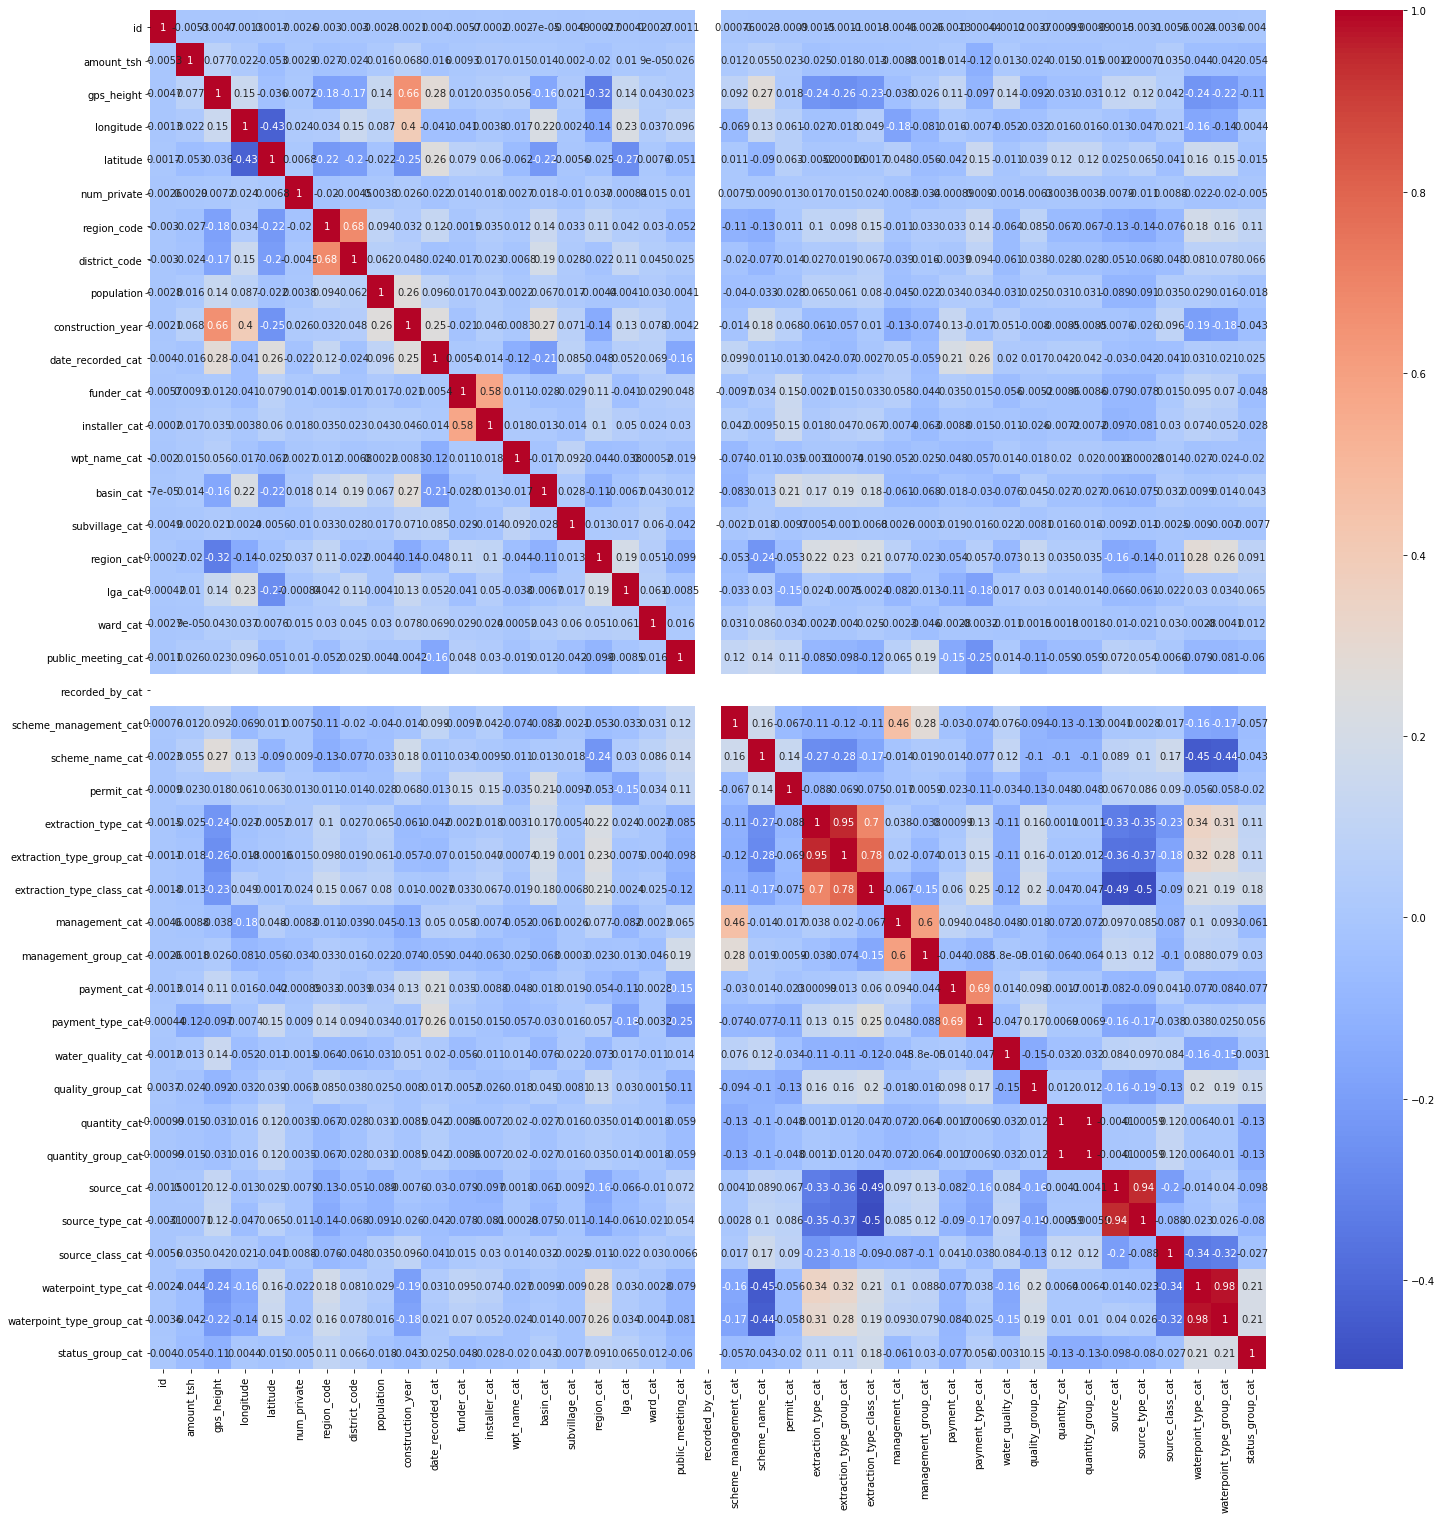

In [36]:
#check correlation
fig = plt.pyplot.gcf()
fig.set_size_inches(25,25)
sns.heatmap(trainingData.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [57]:
print(trainingData.dtypes.unique())

[dtype('int64') dtype('float64')
 CategoricalDtype(categories=['2002-10-14', '2004-01-07', '2004-03-01', '2004-03-06',
                  '2004-04-01', '2004-04-05', '2004-05-01', '2004-06-01',
                  '2004-07-01', '2004-08-01',
                  ...
                  '2013-08-03', '2013-09-02', '2013-09-03', '2013-10-02',
                  '2013-10-03', '2013-11-02', '2013-11-03', '2013-12-01',
                  '2013-12-02', '2013-12-03'],
                 ordered=False)
 CategoricalDtype(categories=['0', 'A/co Germany', 'Aar', 'Abas Ka', 'Abasia',
                  'Abc-ihushi Development Cent', 'Abd', 'Abdala', 'Abddwe',
                  'Abdul',
                  ...
                  'Yasi Naini', 'Yasini', 'Yasini Selemani', 'Zaben',
                  'Zaburi And Neig', 'Zao', 'Zao Water Spring',
                  'Zao Water Spring X', 'Zinduka', 'Zingibali Secondary'],
                 ordered=False)
 CategoricalDtype(categories=['-', '0', 'A.D.B', 'AAR', 'ABASIA', '

In [48]:
#split in labels and features
labels = trainingData['status_group_cat']
features = trainingData.drop(['status_group_cat','id'],axis=1)
no_use_columns = features.select_dtypes(['category']).columns
features = features.drop(no_use_columns, axis=1)
features_list = features.columns

#check shapes
print('labels-shape: ' + str(labels.shape))
print('features-shape: ' + str(features.shape))

labels-shape: (59400,)
features-shape: (59400, 39)


# Try random forest


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [52]:
#split labels and features is train-data and test-data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

#check shape
print('train_features: ', train_features.shape)
print('train_labels: ', train_labels.shape)
print('test_features: ', test_features.shape)
print('test_labels: ', test_labels.shape)

train_features:  (44550, 39)
train_labels:  (44550,)
test_features:  (14850, 39)
test_labels:  (14850,)


In [ ]:
##fit
# create baseline
baseline_preds = 1 # this is 'functional needs repair' - so every pump needs service
baseline_errors = abs(1-test_labels)
print('Baseline_error is: ', round(np.mean(baseline_errors),2))

# train model
randomforest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
randomforest.fit(train_features, train_labels)

Baseline_error is:  0.93


In [ ]:
#predict
predictions = randomforest.predict(test_features)


In [ ]:
#verify
errors = abs(predictions - test_labels)
print ('Mean absolute error is: ', round(np.mean(errors),2))